## Doing Fig4 of Deep's paper

In [ ]:
          |  Deep: hasNS   |  Deep: hasREM  ||   RF: hasNS    |   RF: hasREM  ||  KNN: hasNS    |   KNN: hasREM
Threshold |  TP     FP     |  TP     FP     ||  TP     FP     |  TP     FP    ||  TP    FP      |   TP   FP           
0.07      |  0.999  0.144  |  0.995  0.106  ||  0.999  0.118  |  0.998  0.033 ||  1.000  0.000  |   0.994  0.090
0.27      |  0.995  0.096  |  0.979  0.040  ||  0.994  0.076  |  0.992  0.015 ||  0.998  0.134  |   0.981  0.040
0.51      |  0.986  0.061  |  0.949  0.014  ||  0.984  0.048  |  0.981  0.009 ||  0.990  0.072  |   0.953  0.014
0.80      |  0.959  0.028  |  0.894  0.003  ||  0.961  0.020  |  0.959  0.004 ||  0.981  0.053  |   0.904  0.004
0.94      |  0.900  0.010  |  0.822  0.001  ||  0.925  0.007  |  0.925  0.002 ||  0.965  0.034  |   0.850  0.001

In [1]:
import classyRF
import numpy as np
import matplotlib.pyplot as plt


C:\Users\marin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [11]:
import importlib
importlib.reload(classyRF)

<module 'classyRF' from 'C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\classyRF.py'>

In [2]:
path = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\RM_dataset_NOPUBLIC\\"

In [3]:
i_m1i=1; i_m2i=2; i_x1i=3; i_x2i=4; i_mci=5; i_qi=6; i_Ri=7; i_Ci=8; 
i_m1r=9; i_m2r=10; i_x1r=11; i_x2r=12; i_mcr=13; i_qr=15; i_Rr=16; i_Cr=17;
i_snr=18;
injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_mci, i_qi, i_Ri, i_Ci, i_snr]
recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_mcr, i_qr, i_Rr, i_Cr, i_snr]
independent_injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_snr]
independent_recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_snr]

In [4]:
#Recover last session REM
RF = classyRF.ClassificationRF()
RF.load_train_dataset(path, fname_x='train_REM.csv')
RF.load_test_dataset(path, fname_x='test_REM.csv')
RF.loadModel(path, 'REM_ind_rec_crossvalidated')
RF.subset_features(independent_recovered_index)

loading  C:\Users\marin\Desktop\ML_workingGroup\RM_dataset_NOPUBLIC\REM_ind_rec_crossvalidated.joblib
Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr


In [73]:
path = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\NS_dataset_NOPUBLIC\\"

In [74]:
#Recover last session NS
RFns = classyRF.ClassificationRF()
RFns.load_train_dataset(path, fname_x='train_NS.csv')
RFns.load_test_dataset(path, fname_x='test_NS.csv')
RFns.loadModel(path, 'ind_rec_crossvalidated')
RFns.subset_features(independent_recovered_index)

loading  C:\Users\marin\Desktop\ML_workingGroup\NS_dataset_NOPUBLIC\ind_rec_crossvalidated.joblib
Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr


In [75]:
def generateMasses(model,N):
    data=model.data_test
    maxm1=np.max(data[:,0])
    minm1=np.min(data[:,0])
    maxm2=np.max(data[:,1])
    minm2=np.min(data[:,1])
    print("Trained with m1 in (",minm1,",",maxm1,")")
    print("Trained with m2 in (",minm2,",",maxm2,")")
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    events=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                events.append([m1[i],m2[j]])

    return events

def generateMasses_limited(N):
    maxm1=50
    minm1=1
    maxm2=12
    minm2=1
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    events=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                events.append([m1[i],m2[j]])

    return events

        
def probLabelDensePlot(model, masses, chi1, chi2, snr):
    N=len(masses)
    X=[]
    m1=np.zeros(N)
    m2=np.zeros(N)
    for k in range(0,N):
        X.append([masses[k][0],masses[k][1],chi1,chi2,snr])
        m1[k]=masses[k][0]
        m2[k]=masses[k][1]
    proba_dense   = model.predict_proba(X)
    proba_dense1d = np.reshape(proba_dense[:,1],(N,1))
    prob=np.zeros(N)
    for k in range(0,N):
        prob[k]=proba_dense1d[k][0]
    plt.figure
    sc=plt.scatter(m1,m2, c=prob, vmin=0, vmax=1, s=40, cmap='viridis')
    plt.colorbar(sc)
    plt.xlabel("m1", fontsize=20)
    plt.ylabel("m2", fontsize=20)
    plt.show()
    return

def probLabelDensePlot_hasREM(model, masses, chi1, chi2, snr):
    N=len(masses)
    X=[]
    m1=np.zeros(N)
    m2=np.zeros(N)
    for k in range(0,N):
        X.append([masses[k][0],masses[k][1],chi1,chi2,snr])
        m1[k]=masses[k][0]
        m2[k]=masses[k][1]
    proba_dense   = model.predict_proba(X)
    proba_dense1d = np.reshape(proba_dense[:,1],(N,1))
    prob=np.zeros(N)
    for k in range(0,N):
        prob[k]=proba_dense1d[k][0]
    plt.figure
    sc=plt.scatter(m1,m2, c=prob, vmin=0, vmax=1, s=40, cmap='viridis')
    plt.colorbar(sc)
    #plt.axhline(y = 3, color = 'r', linestyle = '-')
    plt.xlabel("m1", fontsize=20)
    plt.ylabel("m2", fontsize=20)
    plt.show()
    return

def probLabelDensePlot_hasNS(model, masses, chi1, chi2, snr):
    N=len(masses)
    X=[]
    m1=np.zeros(N)
    m2=np.zeros(N)
    for k in range(0,N):
        X.append([masses[k][0],masses[k][1],chi1,chi2,snr])
        m1[k]=masses[k][0]
        m2[k]=masses[k][1]
    proba_dense   = model.predict_proba(X)
    proba_dense1d = np.reshape(proba_dense[:,1],(N,1))
    prob=np.zeros(N)
    for k in range(0,N):
        prob[k]=proba_dense1d[k][0]
    plt.figure
    sc=plt.scatter(m1,m2, c=prob, vmin=0, vmax=1, s=40, cmap='viridis')
    plt.colorbar(sc)
    plt.axhline(y = 3, color = 'r', linestyle = '-')
    plt.xlabel("m1", fontsize=20)
    plt.ylabel("m2", fontsize=20)
    plt.show()
    return

In [55]:
M=generateMasses(RF,100)

Trained with m1 in ( 1.005723 , 295.49323 )
Trained with m2 in ( 1.000009 , 61.151516 )


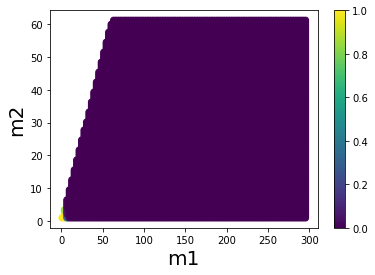

In [62]:
probLabelDensePlot(RF.model,M,0,0,11)


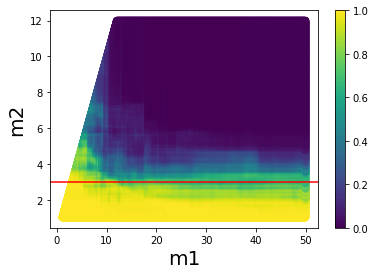

In [77]:
M_l=generateMasses_limited(100)
probLabelDensePlot_hasNS(RFns.model,M_l,0,0,11)